In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# ml tools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



In [2]:
# dl tools
# sequential model to initialize our ANN and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [3]:
churn_data = pd.read_csv('Churn_Modelling.csv',index_col='RowNumber')

In [4]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# same columns are totally unproductive so lets remove them
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [8]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Encoding

In [9]:
churn_data['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
churn_data['Geography']=churn_data['Geography'].map({'France':0,'Germany':1,'Spain':2})
churn_data['Gender']=churn_data['Gender'].map({'Female':0,'Male':1})

In [11]:
churn_data_encoded=churn_data

In [12]:
churn_data_encoded

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,0,1,39,5,0.00,2,1,0,96270.64,0
9997,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9998,709,0,0,36,7,0.00,1,0,1,42085.58,1


## EDA

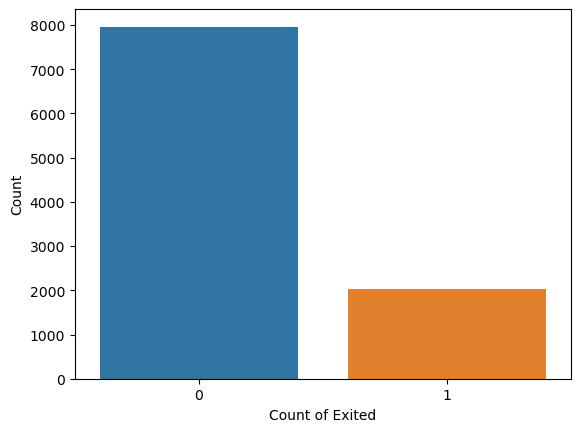

In [13]:
sns.countplot(x=churn_data_encoded['Exited'])
plt.xlabel('Count of Exited')
plt.ylabel('Count')
plt.show()

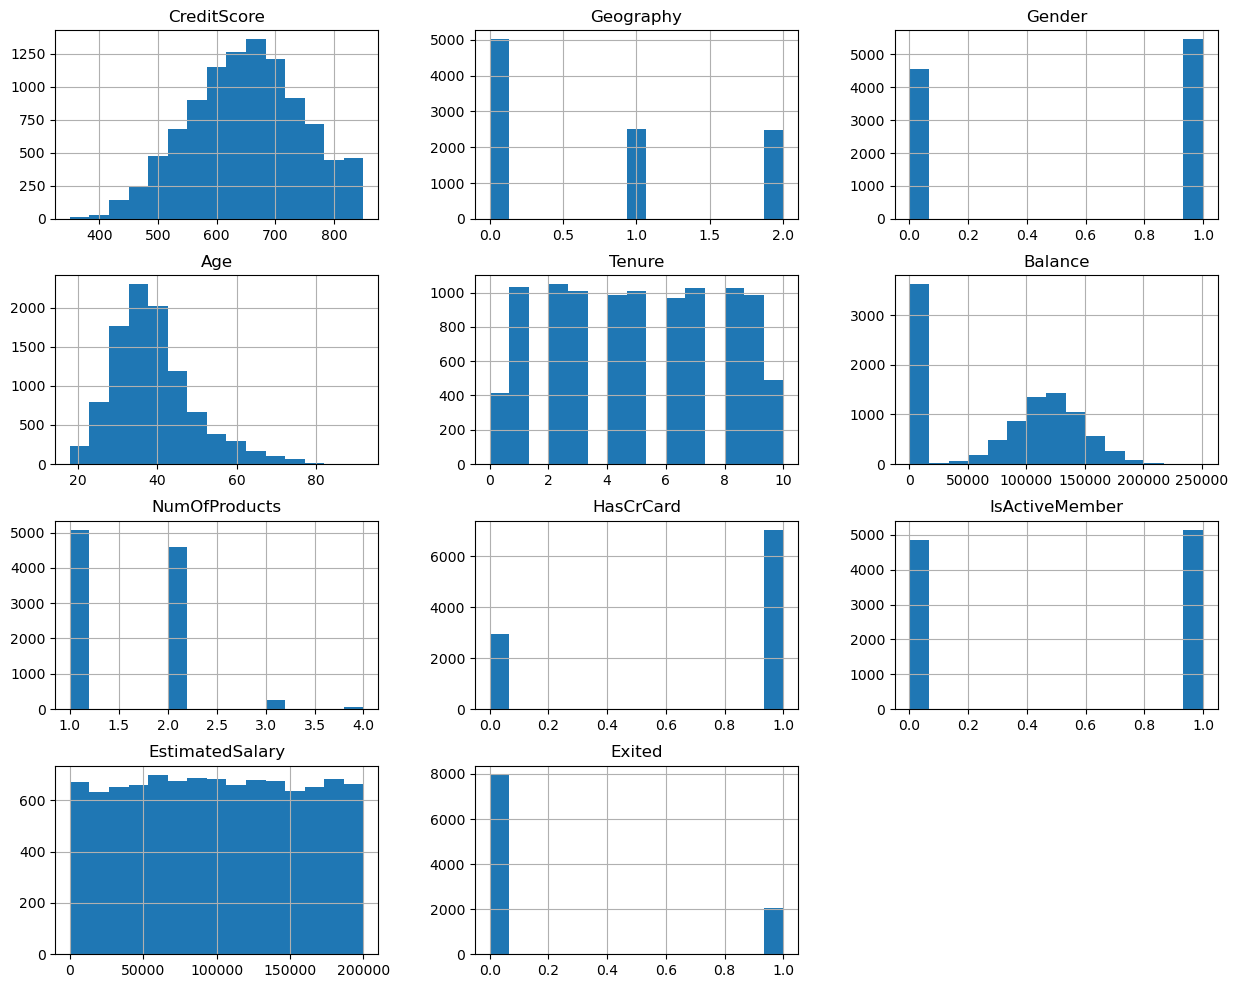

In [14]:
# distribution of all features
churn_data_encoded.hist(figsize=(15,12),bins=15)
plt.title("features  Distribution")
plt.show()

<Axes: >

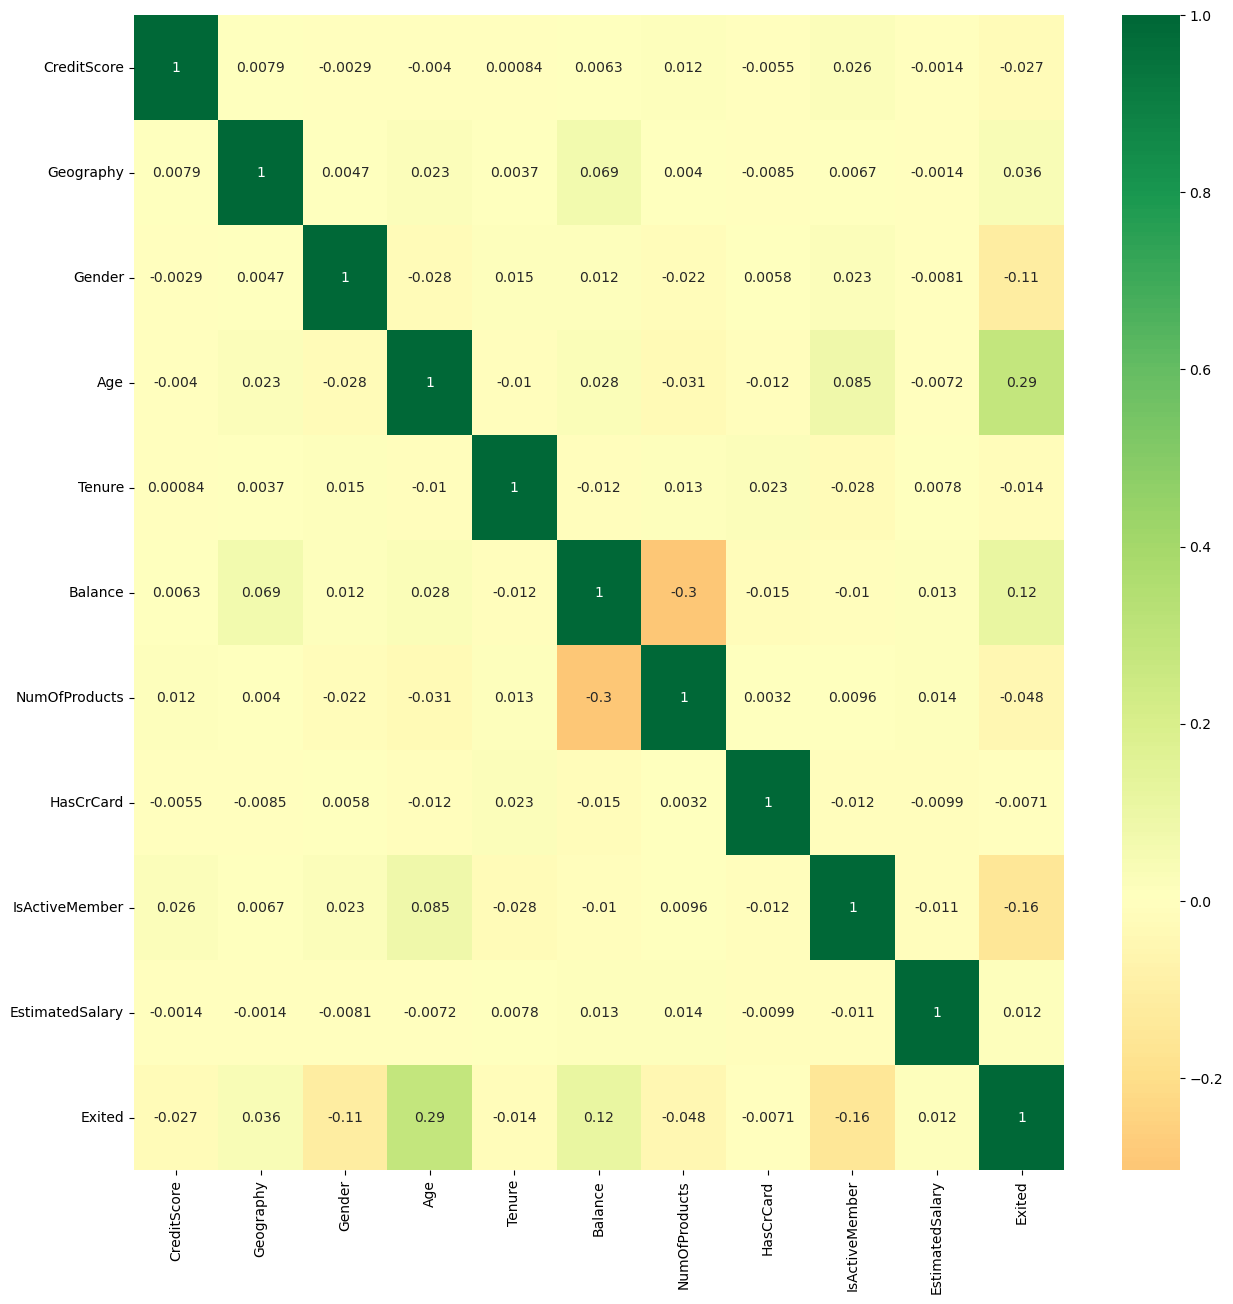

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(churn_data_encoded.corr(),annot=True,cmap= "RdYlGn",center=0)

# train test split

In [16]:
x = churn_data_encoded.drop(['Exited'],axis=1)
y=churn_data_encoded.Exited

In [17]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88
2,608,2,0,41,1,83807.86,1,0,1,112542.58
3,502,0,0,42,8,159660.80,3,1,0,113931.57
4,699,0,0,39,1,0.00,2,0,0,93826.63
5,850,2,0,43,2,125510.82,1,1,1,79084.10


In [18]:
y

RowNumber
1        1
2        0
3        1
4        0
5        0
        ..
9996     0
9997     0
9998     1
9999     1
10000    0
Name: Exited, Length: 10000, dtype: int64

In [19]:
# splitting the dataset into the training setand test sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [20]:
# featuring scaling bcoz yes we don't want one independent variable dominating the other
# and it makes computations easy
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# ANN model for classification

In [21]:
x_train.shape

(8000, 10)

In [ ]:
model = Sequential(
[
    # adding the input layer and the first hidden layer
    Dense(units=6,kernel_initializer='uniform',activation='relu',input_dim=10),
    # adding the second hidden layer
    Dense(units=6,kernel_initializer='uniform',activation='relu'),
    # adding the output layer
    Dense(units=1,kernel_initializer='uniform',activation='sigmoid'),
])

# compiling the ANN / meanss applying SGD on the whole ANN
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
import keras

In [24]:
# fitting the ann to the training set
history = model.fit(x_train , y_train, batch_size=10, epochs=100, verbose=0)

In [25]:
history.history

{'accuracy': [0.7956249713897705,
  0.7960000038146973,
  0.8083750009536743,
  0.8259999752044678,
  0.828249990940094,
  0.8324999809265137,
  0.8414999842643738,
  0.8428750038146973,
  0.846750020980835,
  0.8482499718666077,
  0.8516250252723694,
  0.8502500057220459,
  0.8536249995231628,
  0.8518750071525574,
  0.8527500033378601,
  0.8547499775886536,
  0.8538749814033508,
  0.8546249866485596,
  0.8542500138282776,
  0.8535000085830688,
  0.8546249866485596,
  0.8544999957084656,
  0.8550000190734863,
  0.8539999723434448,
  0.8536249995231628,
  0.859749972820282,
  0.8548750281333923,
  0.8572499752044678,
  0.8552500009536743,
  0.8567500114440918,
  0.8568750023841858,
  0.8560000061988831,
  0.8576250076293945,
  0.8569999933242798,
  0.8578749895095825,
  0.8586249947547913,
  0.8551250100135803,
  0.8560000061988831,
  0.8567500114440918,
  0.8579999804496765,
  0.8566250205039978,
  0.8558750152587891,
  0.8575000166893005,
  0.8567500114440918,
  0.8581249713897705,
 

# Score and metrics

In [26]:
score,acc = model.evaluate(x_train, y_train, batch_size=10)
print('train score ',score)
print('train accuracy' , acc)

800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8658 - loss: 0.3299
train score  0.33398112654685974
train accuracy 0.8650000095367432


In [27]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [28]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
accuracy_score(y_test,y_pred)

0.8635

Text(0.5, 23.52222222222222, 'prediction label')

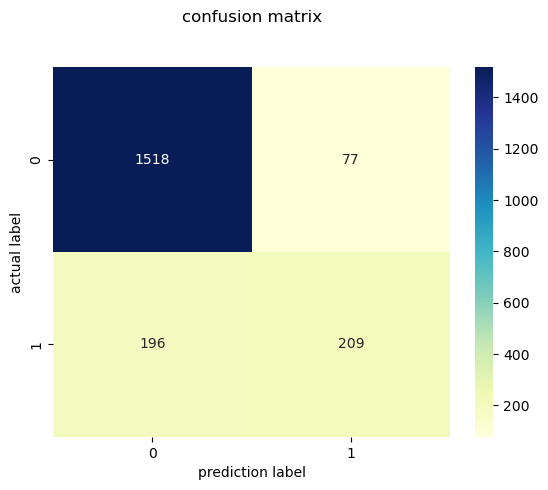

In [30]:
cm=confusion_matrix(y_test,y_pred)
p=sns.heatmap(pd.DataFrame(cm),annot=True,cmap='YlGnBu',fmt='g')
plt.title('confusion matrix',y=1.1)
plt.ylabel('actual label')
plt.xlabel("prediction label")

In [31]:
# import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.52      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


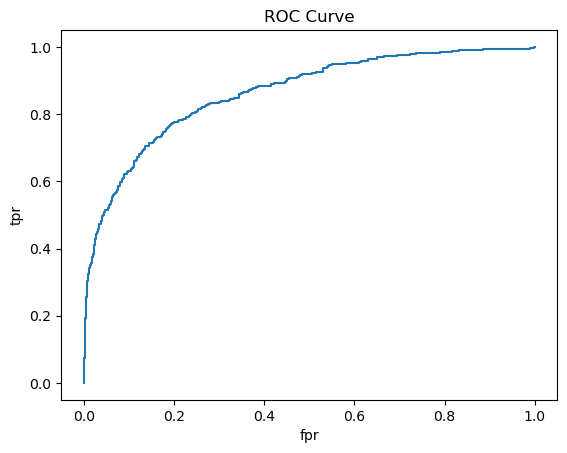

In [32]:
from sklearn.metrics import roc_curve

y_pred_proba=model.predict(x_test)
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)
plt.plot([0.1],[0.1],'k--')
plt.plot(fpr,tpr,label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()

In [33]:
x_test_reshaped = x_test[5].reshape(1,-1)
result=model.predict(x_test_reshaped)
(result>0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[1]])

In [34]:
y_test.iloc[5]

1

In [43]:
import pandas as pd
import numpy as np

def pred(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary):
    features = np.array ([CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary])
    features = features.reshape(1, -1) # Reshape to (1, input_dim)
    result = model.predict(features)
    result = (result > 0.5).astype(int)
    return result

In [44]:
# Example usage:
CreditScore = 619
Geography=0
Gender=0
Age = 42
Tenure=2
Balance= 0.0
NumOfProducts=1
HasCrCard = 1
IsActiveMember = 1
EstimatedSalary= 101348.88
result = pred(CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0]]


In [45]:
if result == 1:
    print("CHURN")
else:
    print("NOT CHURN")

NOT CHURN


In [46]:
churn_data.iloc[0]

CreditScore           619.00
Geography               0.00
Gender                  0.00
Age                    42.00
Tenure                  2.00
Balance                 0.00
NumOfProducts           1.00
HasCrCard               1.00
IsActiveMember          1.00
EstimatedSalary    101348.88
Exited                  1.00
Name: 1, dtype: float64

In [47]:
model.save('model.h5')